In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
from scipy.stats import norm

In [12]:
df = pd.read_csv('Titanic_02.csv')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
female_ages = df.loc[df['Sex'] == 'Female', 'Age'].dropna().tolist()
male_ages = df.loc[df['Sex'] == 'Male', 'Age'].dropna().tolist()
agelist = [male_ages,female_ages]
print(agelist)
print(female_ages)
print(male_ages)

[[0.9167, 30.0, 48.0, 39.0, 71.0, 47.0, 80.0, 24.0, 36.0, 37.0, 26.0, 25.0, 25.0, 28.0, 45.0, 40.0, 42.0, 41.0, 48.0, 45.0, 42.0, 36.0, 33.0, 28.0, 17.0, 11.0, 36.0, 49.0, 36.0, 46.0, 27.0, 45.0, 27.0, 47.0, 37.0, 70.0, 39.0, 51.0, 27.0, 31.0, 31.0, 53.0, 4.0, 50.0, 49.0, 39.0, 36.0, 30.0, 19.0, 64.0, 50.0, 43.0, 60.0, 37.0, 47.0, 24.0, 49.0, 71.0, 53.0, 38.0, 23.0, 46.0, 25.0, 48.0, 45.0, 40.0, 27.0, 55.0, 42.0, 55.0, 42.0, 35.0, 38.0, 49.0, 46.0, 50.0, 32.5, 58.0, 41.0, 42.0, 35.0, 42.0, 29.0, 30.0, 30.0, 19.0, 46.0, 54.0, 36.0, 28.0, 65.0, 44.0, 30.0, 55.0, 47.0, 37.0, 58.0, 64.0, 65.0, 28.5, 45.5, 23.0, 29.0, 18.0, 52.0, 47.0, 38.0, 22.0, 31.0, 45.0, 46.0, 36.0, 55.0, 33.0, 13.0, 61.0, 34.0, 35.0, 50.0, 56.0, 28.0, 56.0, 56.0, 24.0, 24.0, 6.0, 45.0, 57.0, 32.0, 62.0, 54.0, 67.0, 61.0, 52.0, 48.0, 49.0, 17.0, 31.0, 40.0, 61.0, 47.0, 64.0, 60.0, 54.0, 21.0, 57.0, 50.0, 27.0, 51.0, 21.0, 62.0, 30.0, 30.0, 18.0, 25.0, 34.0, 57.0, 18.0, 23.0, 28.0, 51.0, 32.0, 28.0, 1.0, 34.0, 23.0, 26.

In [26]:
male_q1 = np.percentile(male_ages, 25)
male_q3 = np.percentile(male_ages, 75)
male_iqr = male_q3 - male_q1
male_lower_bound = male_q1 - 1.5 * iqr
male_upper_bound = male_q3 + 1.5 * iqr

female_q1 = np.percentile(female_ages, 25)
female_q3 = np.percentile(female_ages, 75)
female_iqr = female_q3 - female_q1
female_lower_bound = female_q1 - 1.5 * iqr
female_upper_bound = female_q3 + 1.5 * iqr

print("male_Q1:", male_q1)
print("male_Q3:", male_q3)
print("male_IQR:", male_iqr)
print("male_Lower Bound:", male_lower_bound)
print("male_Upper Bound:", male_upper_bound)
print('=========================')
print("female_Q1:", female_q1)
print("female_Q3:", female_q3)
print("female_IQR:", female_iqr)
print("female_Lower Bound:", female_lower_bound)
print("female_Upper Bound:", female_upper_bound)

male_Q1: 21.0
male_Q3: 39.0
male_IQR: 18.0
male_Lower Bound: -6.0
male_Upper Bound: 66.0
female_Q1: 19.0
female_Q3: 38.0
female_IQR: 19.0
female_Lower Bound: -8.0
female_Upper Bound: 65.0


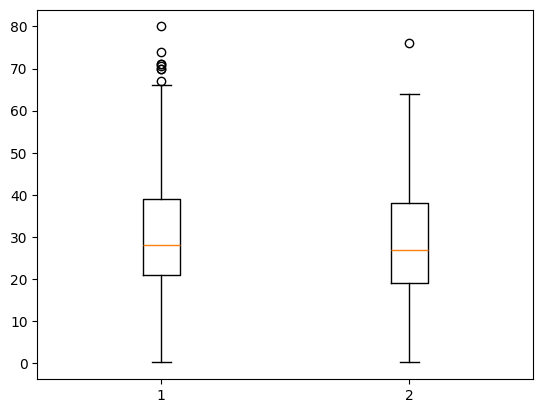

In [8]:
plt.boxplot(agelist)
plt.show()

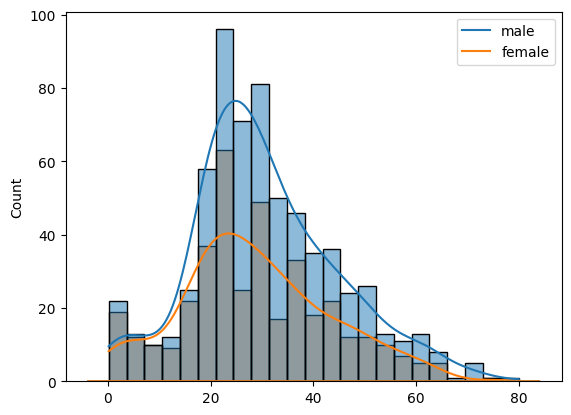

In [23]:
#agelist = df['Age'].dropna().tolist()
sns.histplot(agelist, kde=True)
# 中位數和標準差
male_median_value = np.median(male_ages)
male_std_deviation = np.std(male_ages)
female_median_value = np.std(female_ages)
female_std_deviation = np.std(female_ages)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, male_median_value, male_std_deviation)
p2 = norm.pdf(x, female_median_value, female_std_deviation)

plt.plot(x, p,label='male')  # 'b' for blue
plt.plot(x, p2,label='female')  # 'r' for red
plt.legend()
plt.show()